In [1]:
#Importing the Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('insurance.csv')


In [3]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\RUSHIKESH\anaconda3\envs\ML Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


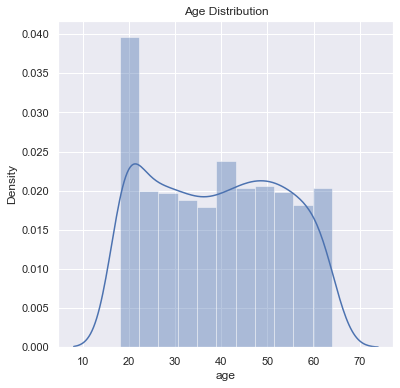

In [6]:
#Distribution of the age value 
sns.set() 
plt.figure(figsize=(6,6))
sns.distplot(dataset['age']) 
plt.title('Age Distribution')
plt.show()

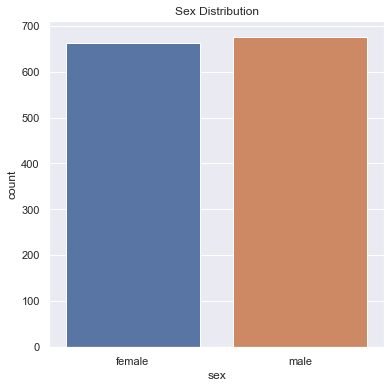

In [7]:
#Gender column (catagorical) count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex' , data=dataset)
plt.title('Sex Distribution')
plt.show()

C:\Users\RUSHIKESH\anaconda3\envs\ML Project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


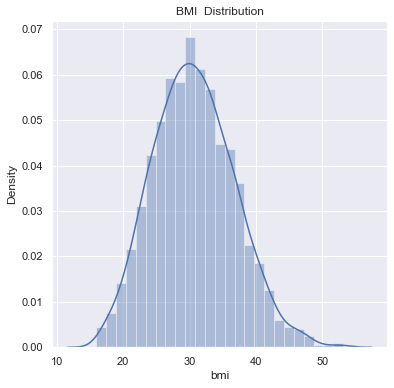

In [8]:
#Distribution of the bmi value distribution plot

plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi']) 
plt.title('BMI  Distribution')
plt.show()

Text(0.5, 1.0, 'Age vs Charges')

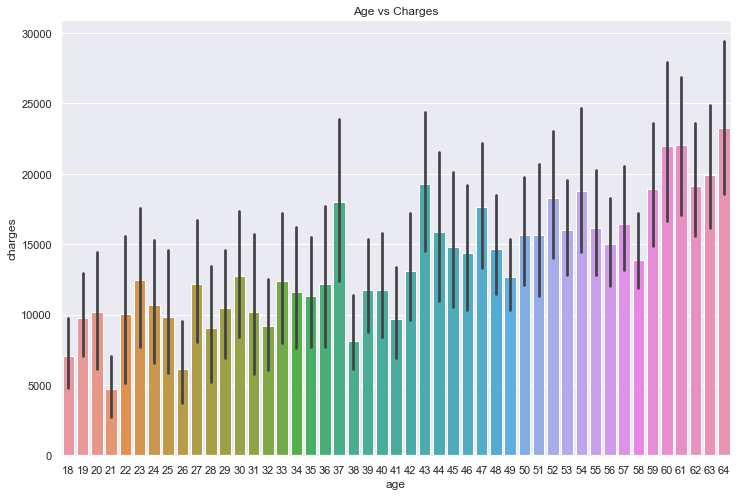

In [9]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = dataset)

plt.title("Age vs Charges")

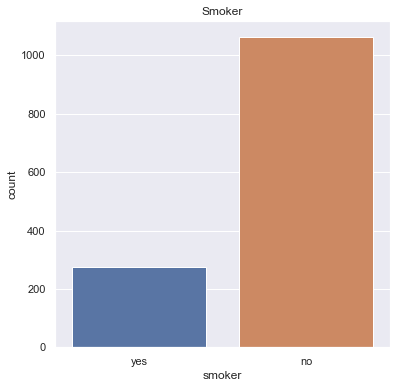

In [10]:
#Smoker Column count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = dataset)
plt.title('Smoker')
plt.show()

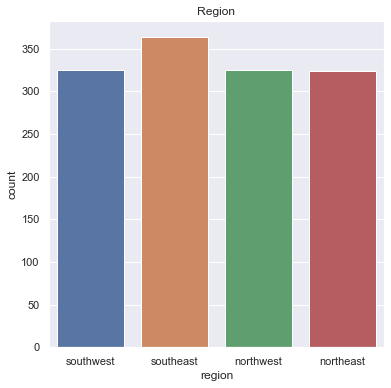

In [11]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = dataset)
plt.title('Region')
plt.show()

In [12]:
#Encoding the Sex Column
dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

#Encoding the Smoker Column
dataset.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

#Encoding the Region Column
dataset.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast':2, 'northwest':3}}, inplace = True)

In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset to training and testing
train, test = train_test_split(dataset, test_size=0.2)

# Split the feature and the target
train_y = train.charges.values
train_x = train.drop(columns=['charges']).values
test_y = test.charges.values
test_x = test.drop(columns=['charges']).values

# See the size of training and testing
print('Training features : ', train_x.shape)
print('Training target : ', train_y.shape)
print('Testing features : ', test_x.shape)
print('Testing target : ', test_y.shape)

Training features :  (1070, 6)
Training target :  (1070,)
Testing features :  (268, 6)
Testing target :  (268,)


In [14]:
rf_model = RandomForestRegressor()
rf_model.fit(train_x, train_y)

RandomForestRegressor()

In [15]:
rf_predict = rf_model.predict(test_x)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate prediction model using MSE

rf_mse = mean_squared_error(test_y, rf_predict)
print('MSE-Random Forest : %.2f (square-rooted)' % math.sqrt(rf_mse))

# Evaluate prediction model using R2-Score

rf_r2 = r2_score(test_y, rf_predict)
print('R2-Random Forest : %.2f' % rf_r2)

MSE-Random Forest : 4262.23 (square-rooted)
R2-Random Forest : 0.88


In [18]:
input_data = (19,1,27.9,0,0,0)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is USD ", prediction[0])

[17384.3605968]
The insurance cost is USD  17384.360596800012


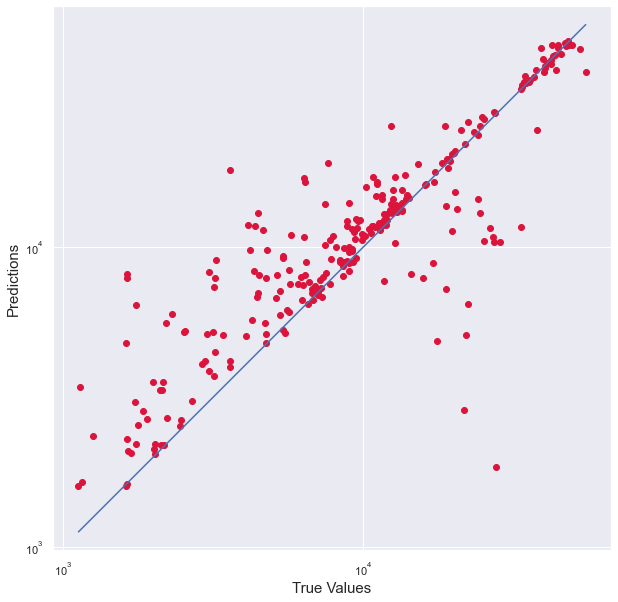

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(test_y, rf_predict, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(test_y), max(test_y))
p2 = min(min(rf_predict), min(test_y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()